In [2]:
import pandas as pd
import numpy as np

---
---
---

---
---
---

# 线性回归
> 容易出现过拟合，为了把训练集数据表现的更好

> **正规方程(很少使用)**
>> `sklearn.linear_model.LinearRegression`  

> **梯度下降**
>> `sklearn.linear_model.SGDRegressor`

In [3]:
from sklearn.datasets import load_boston
lb = load_boston()

In [4]:
lb.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

---
---
---

###  标准化 

In [6]:
x_train, x_test, y_train, y_test = train_test_split(lb.data, lb.target, test_size=0.25)

print(y_train[:50], '\n\n', y_test[:50])

# 标准化 特征值和目标值都要标准化
sd_x = StandardScaler()
sd_y = StandardScaler()

x_train = sd_x.fit_transform(x_train)
x_test = sd_x.transform(x_test)

y_train = sd_y.fit_transform(y_train.reshape(-1, 1)) # 把二维改成一维
y_test = sd_y.transform(y_test.reshape(-1, 1))

[50.  33.3 11.7 18.2 19.9 50.  25.  22.4 19.4 35.2 21.2 24.3 24.7 11.7
 20.3 22.4 25.  35.4 43.5 14.3  6.3 19.3 19.4 18.4 18.9 22.1 29.9 24.1
 23.2 13.5 22.6 27.1 14.4 21.8 22.  10.5 30.3 33.8 22.8 11.  14.1 19.9
 20.5 24.2 20.8 17.8 36.  20.9 18.5 20.1] 

 [19.5 19.3 10.4 29.8 19.5 23.9 12.8 38.7 20.  17.1 13.1 22.5 14.1 20.1
  8.3 13.8 14.2 20.4 15.2 19.5 21.4 19.  26.5 14.5 27.9 31.6 23.7 23.7
 22.6 20.5 19.6 25.2 14.5 23.5 28.7 31.2 16.6 34.9 27.5 25.  22.7 24.
 23.8 24.8 50.  36.2 23.1 14.9 17.8 20.5]


---
---
---

### 正规方程求解方式预测结果

In [7]:
# estimator预测
lr = LinearRegression()
lr.fit(x_train, y_train)

print('正规方程权重参数:\n', lr.coef_) # 权重参数

y_lr_predict = sd_y.inverse_transform(lr.predict(x_test))

print("正规方程测试集里面每个房子的预测价格:\n", y_lr_predict[:10])

正规方程权重参数:
 [[-0.07415721  0.13013773  0.0424006   0.08008398 -0.26127094  0.25146175
   0.06974547 -0.32233922  0.32773714 -0.2571654  -0.25843542  0.11133739
  -0.43258761]]
正规方程测试集里面每个房子的预测价格:
 [[19.7233488 ]
 [17.86228941]
 [16.03802029]
 [32.31005763]
 [19.64633595]
 [27.46792885]
 [13.11847452]
 [35.41011788]
 [20.07823942]
 [17.18208374]]


---
---
---

### 梯度下降进行房价预测

In [8]:
sd = SGDRegressor()
sd.fit(x_train, y_train)

print('梯度下降权重参数:\n', sd.coef_) # 权重参数

y_predict = sd_y.inverse_transform(sd.predict(x_test))

print("梯度下降测试集里面每个房子的预测价格:\n", y_predict[:10])

梯度下降权重参数:
 [-0.04575823  0.06613324 -0.04511962  0.07865729 -0.11135964  0.32966384
  0.017848   -0.22883034  0.09561424 -0.05229418 -0.2167698   0.12141328
 -0.35959479]
梯度下降测试集里面每个房子的预测价格:
 [19.82177694 16.98232239 19.14889974 31.83531872 20.32687344 27.82949654
 13.76979629 36.38719647 19.84987557 18.36864843]


E:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---
---
---

### 回归分析--均方误差

In [9]:
from sklearn.metrics import mean_squared_error

In [13]:
print("正规方程均方误差:\n", mean_squared_error(sd_y.inverse_transform(y_test), y_lr_predict))

print("梯度下降均方误差:\n", mean_squared_error(sd_y.inverse_transform(y_test), y_predict))

print("岭回归均方误差:\n", mean_squared_error(sd_y.inverse_transform(y_test), y_rd_predict))

正规方程均方误差:
 20.943096932638433
梯度下降均方误差:
 19.96015772372678
岭回归均方误差:
 20.829088363869623


---
---
---

---
---
---

# 岭回归
> `sklearn.linear_model.Ridge(alpha=1.0)`

>- 带有正则化的线性回归，解决过拟合

>- 具有`L2`正则化的线性最小二乘法
>- `alpha`:**正则化力度**
>- `coef_`:**回归系数**

In [11]:
from sklearn.linear_model import LinearRegression, SGDRegressor,  Ridge, LogisticRegression

In [12]:
rd = Ridge() # 正则化力度 alpha=0~1, 1~10
rd.fit(x_train, y_train)

print('岭回归权重参数:\n', rd.coef_)

y_rd_predict = sd_y.inverse_transform(rd.predict(x_test))

print("岭回归测试集里面每个房子的预测价格:\n", y_rd_predict[:10])

岭回归权重参数:
 [[-0.0727965   0.12737248  0.03765552  0.08043716 -0.25656788  0.25365091
   0.06743352 -0.31937825  0.31418337 -0.24405976 -0.25680099  0.11161255
  -0.42996148]]
岭回归测试集里面每个房子的预测价格:
 [[19.71183771]
 [17.84232147]
 [16.15960913]
 [32.32958712]
 [19.65039787]
 [27.47622232]
 [13.12678233]
 [35.45236701]
 [20.07071554]
 [17.20247143]]


---
---
---

---
---
---

# 模型的保存与加载
> `SAVE: joblib.dump(rf, 'test.pkl')`   
> `LOAD: estimator = joblib.load('test.pkl')`

In [15]:
from sklearn.externals import joblib

In [16]:
# 保存训练好的模型
joblib.dump(lr, "./test.pkl")

['./test.pkl']

In [17]:
model = joblib.load('./test.pkl')
model_predict = sd_y.inverse_transform(model.predict(x_test))

In [19]:
model_predict[:10]

array([[19.7233488 ],
       [17.86228941],
       [16.03802029],
       [32.31005763],
       [19.64633595],
       [27.46792885],
       [13.11847452],
       [35.41011788],
       [20.07823942],
       [17.18208374]])

---
---
---

---
---
---

# 逻辑回归
> `nsklearn.linear_model.LogisticRegression(penalty=‘l2’, C = 1.0)`  

> 线性回归的式子作为的输入   
> 二分类

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [31]:
column = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
          'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size',
          'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
               
data = pd.read_csv(r'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',
                  names=column)

In [37]:
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [40]:
# 缺失值处理
data = data.replace('?', np.nan)
data = data.dropna()

# 进行数据的分割
t_train, t_test, m_train, m_test = train_test_split(data[column[1:10]],
                                                    data[column[10]], test_size=0.25)

# 标准化
std = StandardScaler()

t_train = std.fit_transform(t_train)
t_test = std.transform(t_test)

lg = LogisticRegression(C=1.0)  # 正则化力度，默认1.0
lg.fit(t_train, m_train)        # 用对数似然不断优化w值

print('逻辑回归权重参数:\n', lg.coef_)
m_predict = lg.predict(t_test)

print('准确率:\n', lg.score(t_test, m_test))

print('召回率:\n', classification_report(m_test,m_predict, labels=[2, 4], target_names=['benign', 'malignant']))

逻辑回归权重参数:
 [[1.37330181 0.06973764 0.71774063 0.34787022 0.09284238 1.29783901
  1.02338987 0.73922437 0.78656732]]
准确率:
 0.9707602339181286
召回率:
              precision    recall  f1-score   support

     benign       0.96      1.00      0.98       107
  malignant       1.00      0.92      0.96        64

avg / total       0.97      0.97      0.97       171



In [43]:
m_predict[:10]

array([2, 4, 4, 2, 2, 4, 2, 4, 2, 2], dtype=int64)

---
---
---

---
---
---

# 聚类
> `K-means` 原理以及案例   
> 没有特征值，按照相似度区分。

 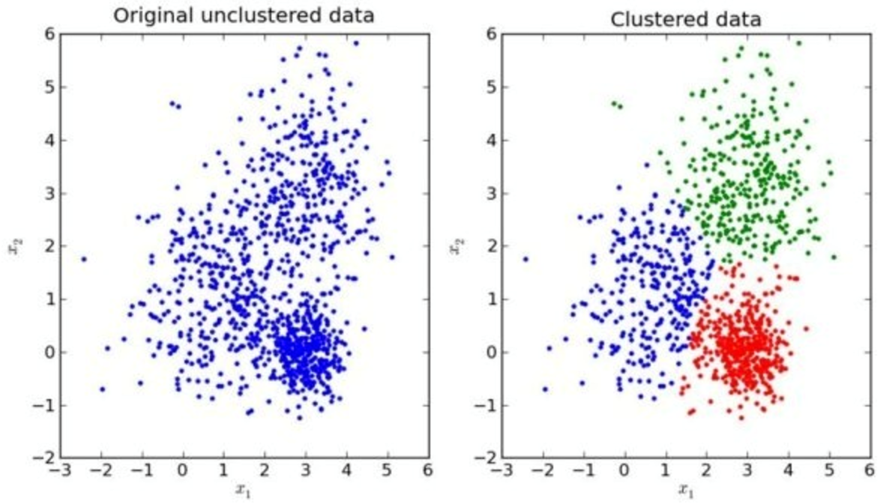

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
km = KMeans()

km.fit(data)

predict = km.predict(data)

silhouette_score(data, predict)  # 0-1越大越好